Analysis of the optimization result dependence on the value of the PROTES parameters for the Ackley model function (n = 16; d = 7). See `demo/demo_func.py` for details.

---

# Imports

In [1]:
import matplotlib as mpl
import numpy as np
from time import perf_counter as tpc


mpl.rcParams.update({
    'font.family': 'normal',
    'font.serif': [],
    'font.sans-serif': [],
    'font.monospace': [],
    'font.size': 12,
    'text.usetex': True,
})


import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns


sns.set_context('paper', font_scale=2.5)
sns.set_style('white')
sns.mpl.rcParams['legend.frameon'] = 'False'


from protes import protes

# Target function

In [2]:
def func_build(d=7, n=16):
    """Ackley function. See https://www.sfu.ca/~ssurjano/ackley.html."""

    a = -32.768         # Grid lower bound
    b = +32.768         # Grid upper bound

    par_a = 20.         # Standard parameter values for Ackley function
    par_b = 0.2
    par_c = 2.*np.pi

    def func(I):
        """Target function: y=f(I); [samples,d] -> [samples]."""
        X = I / (n - 1) * (b - a) + a

        y1 = np.sqrt(np.sum(X**2, axis=1) / d)
        y1 = - par_a * np.exp(-par_b * y1)

        y2 = np.sum(np.cos(par_c * X), axis=1)
        y2 = - np.exp(y2 / d)

        y3 = par_a + np.exp(1.)

        return y1 + y2 + y3

    return d, n, func

In [3]:
d, n, f = func_build() # Target function

# Parameters

In [10]:
# Number of requests to the objective function:
m = int(1.E+4)

# The batch size for optimization:
k_list = [50, 100, 150, 200, 250]

# Number of selected candidates for all batches:
k_top_list = [5, 10, 15, 20, 25]

# TT-rank of the probability TT-tensor:
r_list = [3, 5, 7]

# Number of gradient steps:
k_gd = 1

# Learning rate:
lr = 5.E-2

# Computations

In [5]:
result = {}
for r in r_list:
    result[r] = {}
    for k in k_list:
        result[r][k] = {}
        for k_top in k_top_list:
            t = tpc()
            i_opt, y_opt = protes(f, d, n, m, k=k, k_top=k_top, k_gd=k_gd, lr=lr, r=r, seed=0)
            t = tpc() - t
            print(f'>>> r = {r:-5d} | k = {k:-5d} | k_top = {k_top:-5d} | y = {y_opt:-12.6e} | t = {t:-8.2f}')
            result[r][k][k_top] = {'y': y_opt, 't': t}

>>> r =     3 | k =    50 | k_top =     5 | y = 8.306075e+00 | t =     3.86
>>> r =     3 | k =    50 | k_top =    10 | y = 8.306075e+00 | t =     2.58
>>> r =     3 | k =    50 | k_top =    15 | y = 8.306075e+00 | t =     2.75
>>> r =     3 | k =    50 | k_top =    20 | y = 8.306075e+00 | t =     2.73
>>> r =     3 | k =    50 | k_top =    25 | y = 8.306075e+00 | t =     2.89
>>> r =     3 | k =   100 | k_top =     5 | y = 8.306075e+00 | t =     2.68
>>> r =     3 | k =   100 | k_top =    10 | y = 8.306075e+00 | t =     2.36
>>> r =     3 | k =   100 | k_top =    15 | y = 8.306075e+00 | t =     2.34
>>> r =     3 | k =   100 | k_top =    20 | y = 8.306075e+00 | t =     2.53
>>> r =     3 | k =   100 | k_top =    25 | y = 8.306075e+00 | t =     2.30
>>> r =     3 | k =   150 | k_top =     5 | y = 8.306078e+00 | t =     2.47
>>> r =     3 | k =   150 | k_top =    10 | y = 8.306075e+00 | t =     2.31
>>> r =     3 | k =   150 | k_top =    15 | y = 8.306075e+00 | t =     2.23
>>> r =     

# Plot results

In [37]:
def prep_ax(ax, xlog=False, ylog=False, leg=False, xint=False, xticks=None):
    if xlog:
        ax.semilogx()
    if ylog:
        ax.semilogy()

    if leg:
        ax.legend(loc='lower left', frameon=True)

    ax.grid(ls=":")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    if xint:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    if xticks is not None:
        ax.set(xticks=xticks, xticklabels=xticks)

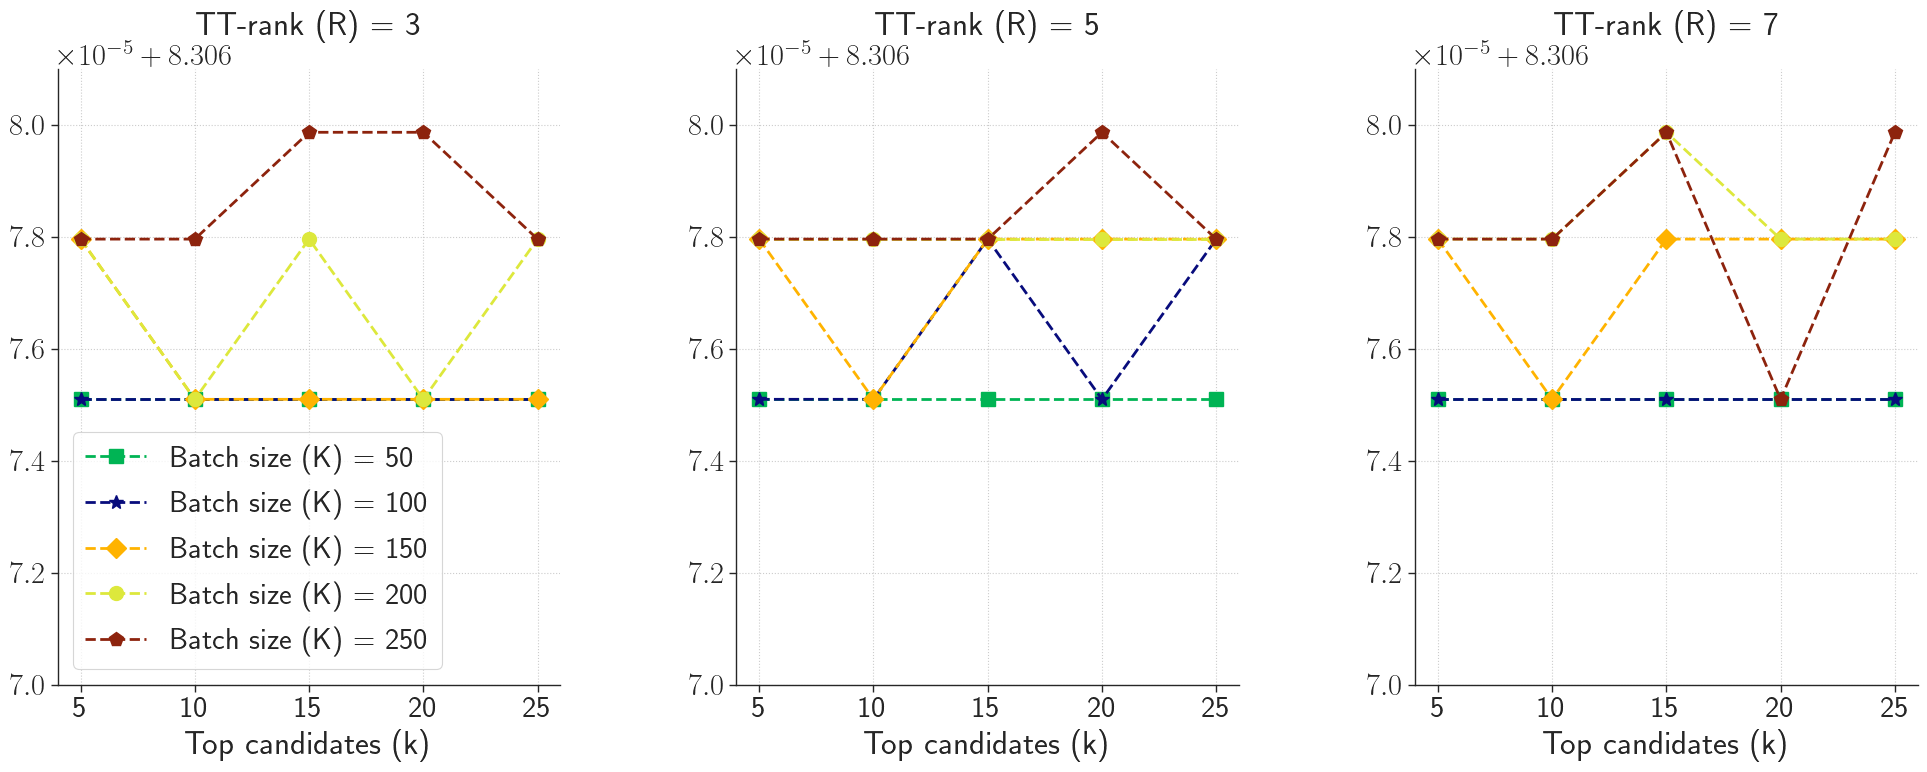

In [39]:
colors = ['#00B454', '#080c7c', '#FFB300', '#DDE83C', '#8d230d']
marker = ['s', '*', 'D', 'o', 'p']
    
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
plt.subplots_adjust(wspace=0.35, hspace=0.35)
axs = axs.flatten()

num = -1
for r in r_list:
    num += 1
    ax = axs[num]
    ax.set_xlabel('Top candidates (k)')
    ax.set_title(f'TT-rank (R) = {r}')    
    
    for i, k in enumerate(k_list):
        x = k_top_list
        y = [result[r][k][x_cur]['y'] for x_cur in x]
        ax.plot(x, y, label=f'Batch size (K) = {k:-3d}',
            linestyle='--',
            marker=marker[i], markersize=10, linewidth=2, color=colors[i])
    
    prep_ax(ax, xlog=False, ylog=False, leg=(num==0),
        xint=True, xticks=k_top_list)
    ax.set_ylim(8.30607, 8.306081)

plt.savefig('figures/check_ackley.png', bbox_inches='tight')

# Parameters for the new run

In [40]:
# Number of requests to the objective function:
m = int(1.E+4)

# The batch size for optimization:
k = 100

# Number of selected candidates for all batches:
k_top = 10

# TT-rank of the probability TT-tensor:
r_list = [3, 5, 7]

# Number of gradient steps:
k_gd_list = [1, 10, 25, 50, 100]

# Learning rate:
lr_list = [5.E-3, 1.E-2, 5.E-2, 1.E-1, 5.E-1]

# Computations

In [41]:
result_ext = {}
for r in r_list:
    result_ext[r] = {}
    for lr in lr_list:
        result_ext[r][lr] = {}
        for k_gd in k_gd_list:
            t = tpc()
            i_opt, y_opt = protes(f, d, n, m, k=k, k_top=k_top, k_gd=k_gd, lr=lr, r=r, seed=0)
            t = tpc() - t
            print(f'>>> r = {r:-5d} | lr = {lr:-7.1e} | k_gd = {k_gd:-5d} | y = {y_opt:-12.6e} | t = {t:-8.2f}')
            result_ext[r][lr][k_gd] = {'y': y_opt, 't': t}

>>> r =     3 | lr = 5.0e-03 | k_gd =     1 | y = 1.426793e+01 | t =     2.21
>>> r =     3 | lr = 5.0e-03 | k_gd =    10 | y = 8.306075e+00 | t =     3.13
>>> r =     3 | lr = 5.0e-03 | k_gd =    25 | y = 8.306075e+00 | t =     4.78
>>> r =     3 | lr = 5.0e-03 | k_gd =    50 | y = 8.306084e+00 | t =     7.54
>>> r =     3 | lr = 5.0e-03 | k_gd =   100 | y = 1.093679e+01 | t =    12.83
>>> r =     3 | lr = 1.0e-02 | k_gd =     1 | y = 1.093679e+01 | t =     2.23
>>> r =     3 | lr = 1.0e-02 | k_gd =    10 | y = 8.306075e+00 | t =     3.39
>>> r =     3 | lr = 1.0e-02 | k_gd =    25 | y = 8.306078e+00 | t =     4.79
>>> r =     3 | lr = 1.0e-02 | k_gd =    50 | y = 8.306078e+00 | t =     7.50
>>> r =     3 | lr = 1.0e-02 | k_gd =   100 | y = 8.306078e+00 | t =    12.78
>>> r =     3 | lr = 5.0e-02 | k_gd =     1 | y = 8.306075e+00 | t =     2.23
>>> r =     3 | lr = 5.0e-02 | k_gd =    10 | y = 8.306075e+00 | t =     3.25
>>> r =     3 | lr = 5.0e-02 | k_gd =    25 | y = 8.306075e+00 |

# Plot results

In [49]:
def prep_ax(ax, xlog=False, ylog=False, leg=False, xint=False, xticks=None):
    if xlog:
        ax.semilogx()
    if ylog:
        ax.semilogy()

    if leg:
        ax.legend(loc='upper right', frameon=True)

    ax.grid(ls=":")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    if xint:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    if xticks is not None:
        ax.set(xticks=xticks, xticklabels=xticks)

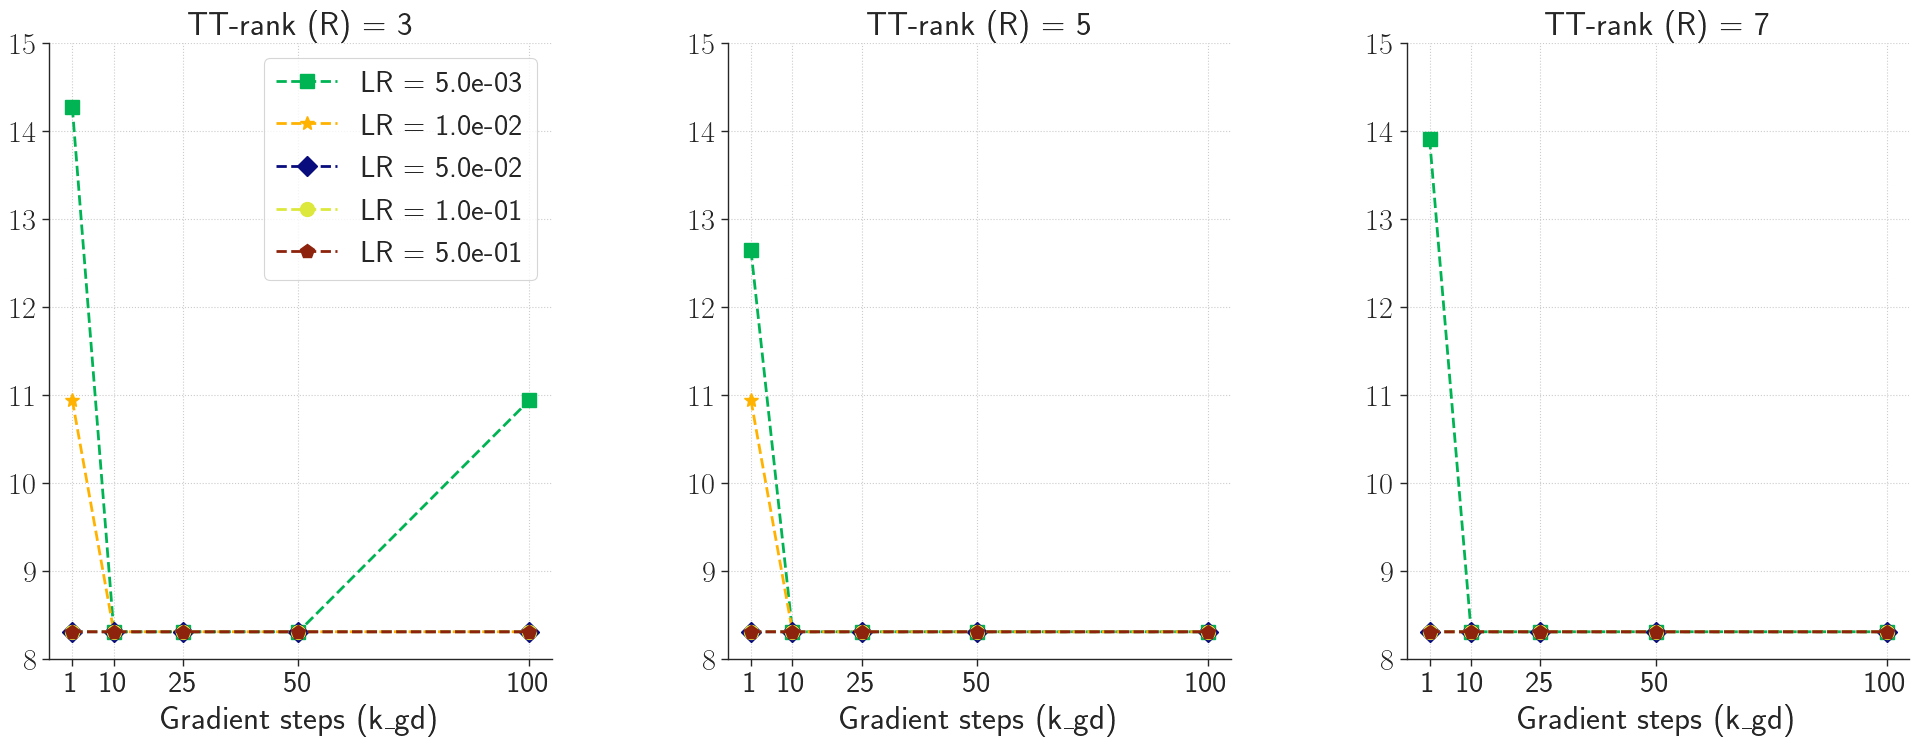

In [51]:
colors = ['#00B454', '#FFB300', '#080c7c', '#DDE83C', '#8d230d']
marker = ['s', '*', 'D', 'o', 'p']
    
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
plt.subplots_adjust(wspace=0.35, hspace=0.35)
axs = axs.flatten()

num = -1
for r in r_list:
    num += 1
    ax = axs[num]
    ax.set_xlabel('Gradient steps (k_gd)')
    ax.set_title(f'TT-rank (R) = {r}')    
    
    for i, lr in enumerate(lr_list):
        x = k_gd_list
        y = [result_ext[r][lr][k_gd_cur]['y'] for k_gd_cur in x]
        ax.plot(x, y, label=f'LR = {lr:-7.1e}', 
            linestyle='--',
            marker=marker[i], markersize=10, linewidth=2, color=colors[i])
    
    prep_ax(ax, xlog=False, ylog=False, leg=(num==0),
        xint=True, xticks=k_gd_list)
    ax.set_ylim(8., 15.)
    #ax.set_ylim(8.30607, 8.306081)

plt.savefig('figures/check_ackley_ext.png', bbox_inches='tight')

---